<a href="https://colab.research.google.com/github/SreehariRamesh/Data-Projects/blob/main/LA_Crime_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **LOADING DATA**

In [11]:
# importing the dataset and librabries

import pandas as pd
import matplotlib.pyplot as plt


crime = pd.read_csv('/content/Crime_Data_from_2020_to_Present_20240921.csv')



### **DATA CLEANING AND TRANSFORMATION**

In [12]:
# printing the first few rows of the dataset

print(crime.head())

       DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0  190326475  03/01/2020 12:00:00 AM  03/01/2020 12:00:00 AM      2130     7   
1  200106753  02/09/2020 12:00:00 AM  02/08/2020 12:00:00 AM      1800     1   
2  200320258  11/11/2020 12:00:00 AM  11/04/2020 12:00:00 AM      1700     3   
3  200907217  05/10/2023 12:00:00 AM  03/10/2020 12:00:00 AM      2037     9   
4  220614831  08/18/2022 12:00:00 AM  08/17/2020 12:00:00 AM      1200     6   

   AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0   Wilshire          784         1     510   
1    Central          182         1     330   
2  Southwest          356         1     480   
3   Van Nuys          964         1     343   
4  Hollywood          666         2     354   

                                Crm Cd Desc  ... Status   Status Desc  \
0                          VEHICLE - STOLEN  ...     AA  Adult Arrest   
1                     BURGLARY FROM VEHICLE  ...     IC   Invest Cont   
2                

In [13]:
# understanding the different columns present in the dataset

crime.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [14]:
# no. of rows and columns

crime.shape

(978628, 28)

In [15]:
# looking at the data types of each column

crime.dtypes

,0
DR_NO,int64
Date Rptd,object
DATE OCC,object
TIME OCC,int64
AREA,int64
AREA NAME,object
Rpt Dist No,int64
Part 1-2,int64
Crm Cd,int64
Crm Cd Desc,object


In [16]:
# checking the number of nulls in each column

crime.isnull().sum()

,0
DR_NO,0
Date Rptd,0
DATE OCC,0
TIME OCC,0
AREA,0
AREA NAME,0
Rpt Dist No,0
Part 1-2,0
Crm Cd,0
Crm Cd Desc,0


In [17]:
# dropping columns not required for analysis

df = crime.drop(labels = ['Mocodes','Weapon Used Cd','Weapon Desc','Crm Cd 2','Crm Cd 3',
                          'Crm Cd 4','Cross Street' ], axis = 1)

In [19]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Vict Age',
       'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc', 'Status',
       'Status Desc', 'Crm Cd 1', 'LOCATION', 'LAT', 'LON'],
      dtype='object')

In [20]:
# sorting the dataframe on date reported

df.sort_values(by = 'Date Rptd')

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON
25077,200404028,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,536,4,Hollenbeck,439,2,901,VIOLATION OF RESTRAINING ORDER,...,M,H,501.0,SINGLE FAMILY DWELLING,IC,Invest Cont,901.0,1800 MARNEY AV,34.0625,-118.1766
122853,201104069,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1030,11,Northeast,1195,1,330,BURGLARY FROM VEHICLE,...,F,H,101.0,STREET,IC,Invest Cont,330.0,STADIUM WY,34.0724,-118.2470
34551,202004041,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,530,20,Olympic,2045,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,...,F,H,503.0,HOTEL,AO,Adult Other,626.0,3100 W 8TH ST,34.0577,-118.2971
24443,201900503,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,510,19,Mission,1967,1,121,"RAPE, FORCIBLE",...,F,H,501.0,SINGLE FAMILY DWELLING,AO,Adult Other,121.0,9400 OBECK AV,34.2409,-118.4329
159283,201604154,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1300,16,Foothill,1658,2,888,TRESPASSING,...,M,W,501.0,SINGLE FAMILY DWELLING,IC,Invest Cont,888.0,10200 MARCUS AV,34.2540,-118.2820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681531,230719088,12/31/2023 12:00:00 AM,12/29/2023 12:00:00 AM,2200,7,Wilshire,769,1,330,BURGLARY FROM VEHICLE,...,M,H,101.0,STREET,IC,Invest Cont,330.0,1300 6TH AV,34.0475,-118.3230
865886,232019883,12/31/2023 12:00:00 AM,12/31/2023 12:00:00 AM,400,20,Olympic,2062,2,624,BATTERY - SIMPLE ASSAULT,...,M,H,101.0,STREET,IC,Invest Cont,624.0,11TH ST,34.0508,-118.3101
801626,241404110,12/31/2023 12:00:00 AM,12/31/2023 12:00:00 AM,505,14,Pacific,1459,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,M,H,101.0,STREET,IC,Invest Cont,331.0,5000 SAWTELLE BL,33.9978,-118.4044
866672,231821470,12/31/2023 12:00:00 AM,12/31/2023 12:00:00 AM,1245,18,Southeast,1829,1,510,VEHICLE - STOLEN,...,NaN,NaN,108.0,PARKING LOT,IC,Invest Cont,510.0,2400 E CENTURY BL,33.9465,-118.2300


In [22]:
df.dtypes

,0
DR_NO,int64
Date Rptd,object
DATE OCC,object
TIME OCC,int64
AREA,int64
AREA NAME,object
Rpt Dist No,int64
Part 1-2,int64
Crm Cd,int64
Crm Cd Desc,object


In [27]:
# Changing the datatypes of date columns to date datatype

df['Date Rptd'] = pd.to_datetime(df['Date Rptd'], format= '%m/%d/%Y %I:%M:%S %p')
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'],format= '%m/%d/%Y %I:%M:%S %p')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978628 entries, 0 to 978627
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DR_NO         978628 non-null  int64         
 1   Date Rptd     978628 non-null  datetime64[ns]
 2   DATE OCC      978628 non-null  datetime64[ns]
 3   TIME OCC      978628 non-null  int64         
 4   AREA          978628 non-null  int64         
 5   AREA NAME     978628 non-null  object        
 6   Rpt Dist No   978628 non-null  int64         
 7   Part 1-2      978628 non-null  int64         
 8   Crm Cd        978628 non-null  int64         
 9   Crm Cd Desc   978628 non-null  object        
 10  Vict Age      978628 non-null  int64         
 11  Vict Sex      841430 non-null  object        
 12  Vict Descent  841419 non-null  object        
 13  Premis Cd     978613 non-null  float64       
 14  Premis Desc   978043 non-null  object        
 15  Status        978

In [32]:
df.describe(include = ['float64','int64'])

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Crm Cd 1,LAT,LON
count,9.786280e+05,978628.000000,978628.000000,978628.000000,978628.000000,978628.000000,978628.000000,978613.000000,978617.000000,978628.000000,978628.000000
mean,2.196564e+08,1338.802627,10.702561,1116.686084,1.404785,500.810635,29.122904,306.181502,500.564847,33.995399,-118.081108
std,1.290395e+07,651.622947,6.107280,610.836054,0.490851,206.309796,21.961531,218.908131,206.107451,1.640056,5.684520
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-4.000000,101.000000,110.000000,0.000000,-118.667600
25%,2.106073e+08,900.000000,5.000000,589.000000,1.000000,331.000000,0.000000,101.000000,331.000000,34.014600,-118.430500
50%,2.208116e+08,1420.000000,11.000000,1141.000000,1.000000,442.000000,30.000000,203.000000,442.000000,34.058900,-118.322500
75%,2.309110e+08,1900.000000,16.000000,1617.000000,2.000000,626.000000,44.000000,501.000000,626.000000,34.164900,-118.273900
max,2.499253e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,956.000000,34.334300,0.000000


In [33]:
# investigating inconsistent data entries in the victim age column

df['Vict Age'].unique()

array([  0,  47,  19,  28,  41,  25,  27,  24,  26,   8,   7,  56,  22,
        23,  31,  30,  57,  12,  46,  51,  37,  20,  29,  33,  34,  15,
        65,  59,   9,  35,  50,  64,  79,  40,  44,  32,  16,  21,  42,
         6,  72,  10,  60,  36,  18,  63,  17,   5,  39,  62,  58,  45,
        54,  14,  71,  69,  49,  38,  13,  61,  -2,  43,  78,  67,  53,
        11,  48,  73,  52,  68,  81,  80,   3,  55,  89,  70,  77,  83,
        91,  82,  75,  76,  74,  -1,   2,  66,  84,  -3,   4,  87,  86,
        85,  90,  99,  96,  88,  92,  94,  93,  95,  97,  98, 120,  -4])

In [35]:
# investigating inconsistent data entries in the victim age column

df['Vict Age'].value_counts()

,count
Vict Age,
0,257559
30,21817
35,21366
31,20958
29,20889
...,...
98,71
-2,29
-3,5


In [42]:
# creating a new datafranme to include only entries with age > 0

df_age = df[df['Vict Age'] > 0]

In [43]:
df_age['Vict Age'].value_counts()

,count
Vict Age,
30,21817
35,21366
31,20958
29,20889
28,20543
...,...
95,99
96,95
97,72


In [44]:
# Creating columns to analyse crime by the year and month of occurence

df['Year'] = df['DATE OCC'].dt.year
df['Month'] = df['DATE OCC'].dt.month

In [45]:
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON,Year,Month
0,190326475,2020-03-01,2020-03-01,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,101.0,STREET,AA,Adult Arrest,510.0,1900 S LONGWOOD AV,34.0375,-118.3506,2020,3
1,200106753,2020-02-09,2020-02-08,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),IC,Invest Cont,330.0,1000 S FLOWER ST,34.0444,-118.2628,2020,2
2,200320258,2020-11-11,2020-11-04,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,480.0,1400 W 37TH ST,34.0210,-118.3002,2020,11
3,200907217,2023-05-10,2020-03-10,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,405.0,CLOTHING STORE,IC,Invest Cont,343.0,14000 RIVERSIDE DR,34.1576,-118.4387,2020,3
4,220614831,2022-08-18,2020-08-17,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,102.0,SIDEWALK,IC,Invest Cont,354.0,1900 TRANSIENT,34.0944,-118.3277,2020,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978623,240710284,2024-07-24,2024-07-23,1400,7,Wilshire,788,1,510,VEHICLE - STOLEN,...,101.0,STREET,IC,Invest Cont,510.0,4000 W 23RD ST,34.0362,-118.3284,2024,7
978624,240104953,2024-01-15,2024-01-15,100,1,Central,101,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,503.0,HOTEL,IC,Invest Cont,745.0,1300 W SUNSET BL,34.0685,-118.2460,2024,1
978625,241711348,2024-07-19,2024-07-19,757,17,Devonshire,1751,2,888,TRESPASSING,...,885.0,MTA - ORANGE LINE - CHATSWORTH,IC,Invest Cont,888.0,10000 OLD DEPOT PLAZA RD,34.2500,-118.5990,2024,7
978626,240309674,2024-04-24,2024-04-24,1500,3,Southwest,358,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,102.0,SIDEWALK,IC,Invest Cont,230.0,FLOWER ST,34.0215,-118.2868,2024,4


### **UNDERSTANDING THE DATA THROUGH VISUALISATIONS**

In [50]:
df.sort_values(by = 'DATE OCC')

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON,Year,Month
26883,200704075,2020-01-01,2020-01-01,1800,7,Wilshire,733,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,147.0,POOL-PUBLIC/OUTDOOR OR INDOOR*,IC,Invest Cont,341.0,CURSON,34.0649,-118.3546,2020,1
103421,200104201,2020-01-03,2020-01-01,130,1,Central,132,1,330,BURGLARY FROM VEHICLE,...,101.0,STREET,IC,Invest Cont,330.0,3RD,34.0530,-118.2513,2020,1
46101,201004022,2020-01-02,2020-01-01,2300,10,West Valley,1089,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,103.0,ALLEY,IC,Invest Cont,420.0,4500 SHERMAN OAKS AV,34.1524,-118.4694,2020,1
159489,201905960,2020-02-07,2020-01-01,1200,19,Mission,1971,2,946,OTHER MISCELLANEOUS CRIME,...,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",AO,Adult Other,946.0,15500 RAYEN ST,34.2337,-118.4703,2020,1
181971,200505375,2020-02-03,2020-01-01,1400,5,Harbor,557,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,108.0,PARKING LOT,IC,Invest Cont,420.0,100 S GAFFEY ST,33.7433,-118.2923,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957735,240214581,2024-09-16,2024-09-16,910,2,Rampart,211,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,724.0,TRADE SCHOOL (MEDICAL-TECHNICAL-BUSINESS)*,IC,Invest Cont,740.0,4000 ROSEWOOD AV,34.0814,-118.2962,2024,9
943271,241911700,2024-09-16,2024-09-16,1255,19,Mission,1998,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),...,405.0,CLOTHING STORE,IC,Invest Cont,442.0,7800 VAN NUYS BL,34.2153,-118.4409,2024,9
945293,241215310,2024-09-16,2024-09-16,1035,12,77th Street,1233,2,437,RESISTING ARREST,...,101.0,STREET,IC,Invest Cont,437.0,1900 W SLAUSON AV,33.9891,-118.3121,2024,9
946199,240611945,2024-09-16,2024-09-16,1215,6,Hollywood,643,1,510,VEHICLE - STOLEN,...,101.0,STREET,IC,Invest Cont,510.0,7400 W SUNSET BL,34.1007,-118.3494,2024,9


<Axes: xlabel='Month'>

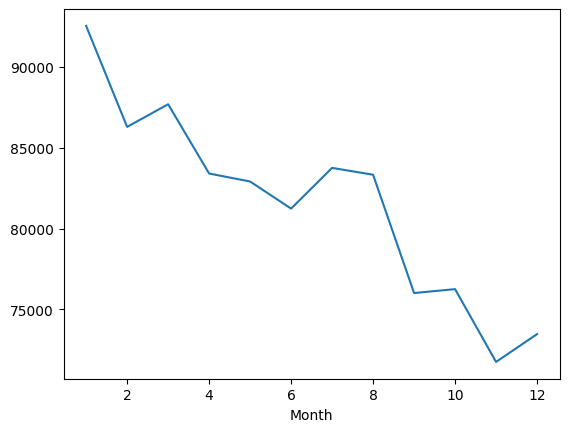

In [51]:
# Understanding crimes commited by month

df['Month'].value_counts().sort_index().plot()

# The values dropping in the month towards the end of the year is because
# the last entries of data is only till september for the year 2024

<Axes: xlabel='Month'>

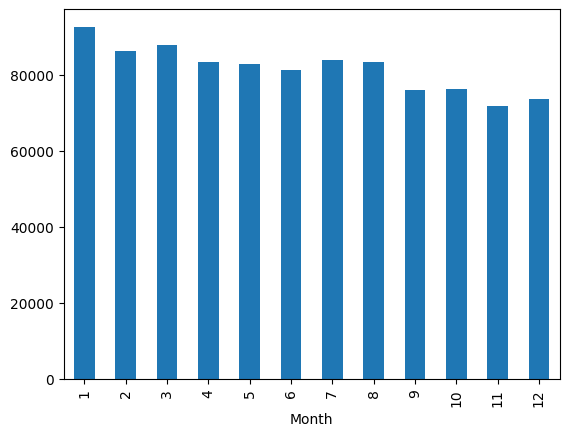

In [54]:
df['Month'].value_counts().sort_index().plot(kind = 'bar')

<Axes: xlabel='Year'>

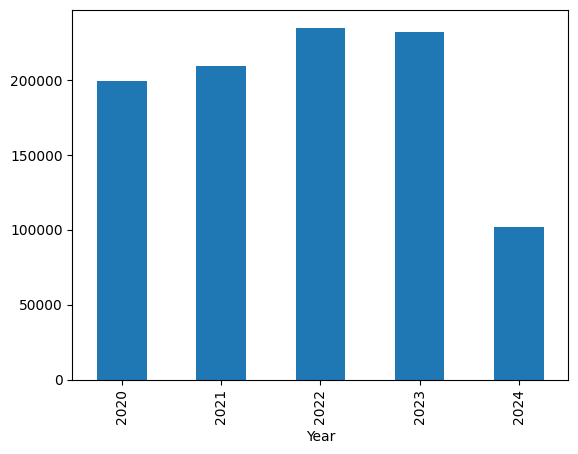

In [53]:
# Analysing crimes commited by year

df['Year'].value_counts().sort_index().plot(kind = 'bar')

<Axes: xlabel='Year,Month'>

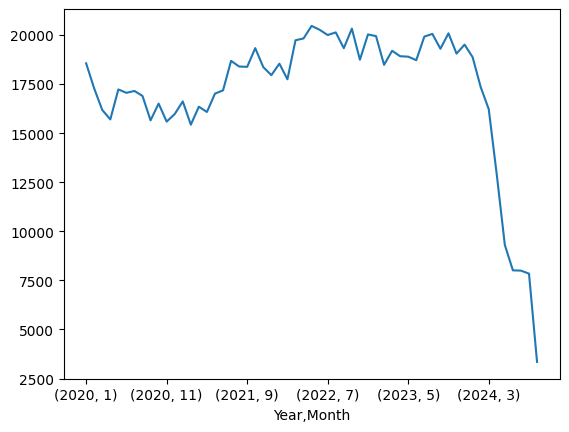

In [59]:
# Analysing crime trend by month and year

df.groupby(['Year','Month']).size().plot()

<Axes: ylabel='Frequency'>

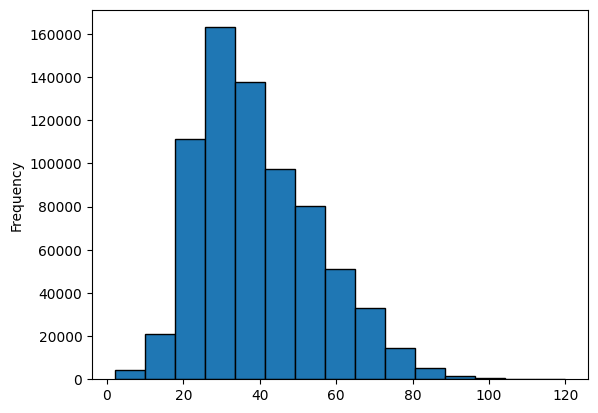

In [58]:
# visualising victim age

df_age['Vict Age'].plot(kind = 'hist', edgecolor = 'black', bins = 15)

In [60]:
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON,Year,Month
0,190326475,2020-03-01,2020-03-01,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,101.0,STREET,AA,Adult Arrest,510.0,1900 S LONGWOOD AV,34.0375,-118.3506,2020,3
1,200106753,2020-02-09,2020-02-08,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),IC,Invest Cont,330.0,1000 S FLOWER ST,34.0444,-118.2628,2020,2
2,200320258,2020-11-11,2020-11-04,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,480.0,1400 W 37TH ST,34.0210,-118.3002,2020,11
3,200907217,2023-05-10,2020-03-10,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,405.0,CLOTHING STORE,IC,Invest Cont,343.0,14000 RIVERSIDE DR,34.1576,-118.4387,2020,3
4,220614831,2022-08-18,2020-08-17,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,102.0,SIDEWALK,IC,Invest Cont,354.0,1900 TRANSIENT,34.0944,-118.3277,2020,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978623,240710284,2024-07-24,2024-07-23,1400,7,Wilshire,788,1,510,VEHICLE - STOLEN,...,101.0,STREET,IC,Invest Cont,510.0,4000 W 23RD ST,34.0362,-118.3284,2024,7
978624,240104953,2024-01-15,2024-01-15,100,1,Central,101,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,503.0,HOTEL,IC,Invest Cont,745.0,1300 W SUNSET BL,34.0685,-118.2460,2024,1
978625,241711348,2024-07-19,2024-07-19,757,17,Devonshire,1751,2,888,TRESPASSING,...,885.0,MTA - ORANGE LINE - CHATSWORTH,IC,Invest Cont,888.0,10000 OLD DEPOT PLAZA RD,34.2500,-118.5990,2024,7
978626,240309674,2024-04-24,2024-04-24,1500,3,Southwest,358,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,102.0,SIDEWALK,IC,Invest Cont,230.0,FLOWER ST,34.0215,-118.2868,2024,4


In [64]:
# Analysing crimes commited by crime descritption and date occured
# using a new dataframe fror grouping the above columns

crimes_daily = df.groupby(['DATE OCC','Crm Cd Desc',]).size()

In [65]:
crimes_daily

DATE OCC    Crm Cd Desc                                            
2020-01-01  ARSON                                                       4
            ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             47
            ATTEMPTED ROBBERY                                           5
            BATTERY - SIMPLE ASSAULT                                   74
            BATTERY ON A FIREFIGHTER                                    1
                                                                       ..
2024-09-16  THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)             3
            THEFT OF IDENTITY                                           1
            TRESPASSING                                                 8
            VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     3
            VEHICLE - STOLEN                                            8
Length: 90093, dtype: int64

In [68]:
# calculating mean of different crimes

crimes_daily.groupby('Crm Cd Desc').mean().reset_index(name = 'mean_daily_count')

,Crm Cd Desc,mean_daily_count
0,ARSON,2.084967
1,ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,2.520000
2,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",31.825880
3,ATTEMPTED ROBBERY,3.200795
4,BATTERY - SIMPLE ASSAULT,44.629408
...,...,...
135,"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, B...",2.270962
136,VIOLATION OF COURT ORDER,4.052833
137,VIOLATION OF RESTRAINING ORDER,7.377750
138,VIOLATION OF TEMPORARY RESTRAINING ORDER,1.369985


In [72]:
# identifying top 20 crimes by daily frequency
# Moved this into a new dataframe top_20_crimes

top_20_crimes = crimes_daily.groupby('Crm Cd Desc').mean().reset_index(name = 'mean_daily_count').sort_values(by =
                                                       'mean_daily_count', ascending = False).head(20)

In [73]:
top_20_crimes

,Crm Cd Desc,mean_daily_count
134,VEHICLE - STOLEN,63.861708
4,BATTERY - SIMPLE ASSAULT,44.629408
21,BURGLARY FROM VEHICLE,35.451482
116,THEFT OF IDENTITY,35.210343
131,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",34.520628
20,BURGLARY,34.174067
2,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",31.825880
118,THEFT PLAIN - PETTY ($950 & UNDER),29.664535
74,INTIMATE PARTNER - SIMPLE ASSAULT,28.716482
114,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),22.798954


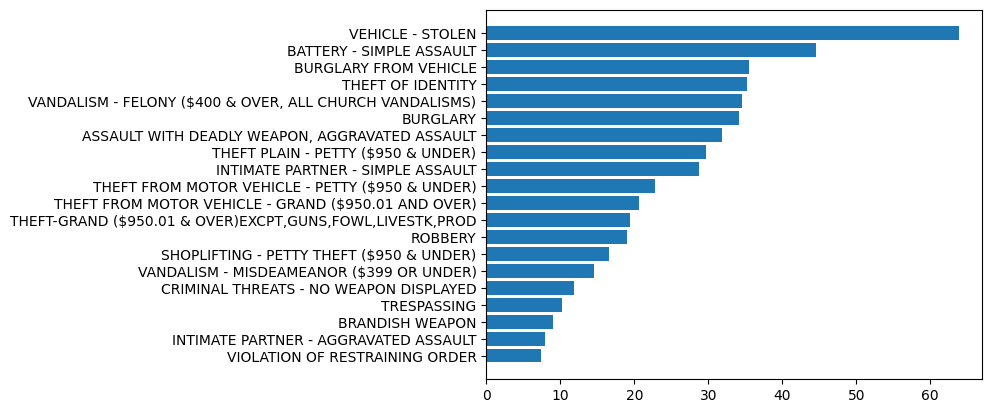

In [76]:
#Visualising top 20 crimes daily

plt.barh(top_20_crimes['Crm Cd Desc'], top_20_crimes['mean_daily_count'])
plt.gca().invert_yaxis()
plt.show()